## **COMP-3703 (241551) Introduction to Artificial Intelligence**
## **Project1**
### **Felix Cazarez**


In [43]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from collections import Counter



### **Loading Data & Basic Exploration**
**Question 1.**
**Part a)** 
* Load the data from the given path into a pandas DataFrame

In [44]:
# load the csv uploaded to github into a pandas DataFrame
# Import database using github link
url = "https://raw.githubusercontent.com/Fcazarez/DSML_IntroAI/main/student-por.csv"
df = pd.read_csv(url, encoding="unicode_escape", sep=";")
# take a look at the data
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### **Loading Data & Basic Exploration**
**Question 1.**

**Part b)** 
* How many rows are there in the dataset?

In [45]:
print("Number of rows in the df:", df.shape[0])
print("Number of columns in the df:", len(df.columns))
print("="*30)
print('Columns are: \n', df.columns)


Number of rows in the df: 649
Number of columns in the df: 33
Columns are: 
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### **Loading & Basic Exploration**
**Part2.a)**
* Combine the grades G1, G2, and G3 into a column called total_mark.


In [46]:
import pandas as pd

# Assuming df is your DataFrame
df['total_mark'] = df[['G1', 'G2', 'G3']].sum(axis=1)
df

# Now the 'total_mark' column will contain the sum of G1, G2, and G3 for each row


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_mark
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,22
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,31
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,37
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,42
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,31
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,46
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,32
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,30


### Loading & Basic Exploration
**Part2.b)**
* Create a new binary column called pass. If the total mark is below 35 for G1, G2,and G3, it should be labeled as 0 (fail), else 1 (pass).

In [5]:
import pandas as pd

df['pass'] = df['total_mark'] >= 35  # Assuming passing total is 35 for each subject

# Convert the boolean values (True/False) to 1 and 0
df['pass'] = df['pass'].astype(int)
df

# Now the 'pass' column will contain 1 for pass and 0 for fail based on the condition


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,total_mark,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,22,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,31,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,37,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,42,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,31,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,46,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,32,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,30,0


### Loading & Basic Exploration
**Part2.c)** 
* Drop the columns G1, G2, G3, and total_mark.

In [6]:
# drop columns
df.drop(columns=['G1', 'G2', 'G3', 'total_mark'], inplace=True)


### Loading & Basic Exploration
**Part2.d)**  
* How many columns are left after this operation?


In [7]:
num_columns = df.shape[1]

# Print the number of students
print("Number of remaining columns:", num_columns)

Number of remaining columns: 31


### Loading & Basic Exploration
**Part2.e)** 
*How many students are in the data set?

In [8]:
# check for duplicate entries
df.duplicated().sum()

0

In [9]:
# check for null value
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
pass          0
dtype: int64

In [10]:
num_students = df.shape[0]

# Print the number of students
print("Number of students:", num_students)

Number of students: 649


### **Loading & Basic Exploration**
**Part2.f)**  
*How many students passed?


In [11]:
# count how many students passed, have pass = 1
pass_count = (df['pass'] == 1).sum()
print("Number of students passed :", pass_count)

Number of students passed : 328


##### **Loading & Basic Exploration**
**Part2.g)**  
* Discuss the data distribution.


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


**Comments:**
* *Age of students:* The age of students ranges from 16 to 18, mainly around the mean of 17, in a range of 15 to 22 years old.
* *Parental Education (Medu and Fedu):* Both maternal and paternal education levels have a wide range.
* *Travel Time:* Most students have a travel time of 1 unit.
* *Study Time:* The average study time is around 1.93 hours. which is low but depends on the standar level.
* *Failures:* On average, students have a very low number of past class failures, which make sense.
* *Family Relationships (famrel):* The majority of students rate their family relationships highly, with an average score of around 3.93, which means the family and environment of the children is healthy
* *Free Time, Going Out, and Weekend Alcohol Consumption (freetime, goout, Dalc, Walc):* These variables show variations in students' free time, going out, and alcohol consumption habits.
* *Health:* Students' self-reported health scores range from 1 to 5, with an average of approximately 3.54.
* *Absences:* The number of absences ranges from 0 to 32, with an average of approximately 3.66. which is low and expected.
* *Pass:* Approximately 50.54% of students in the dataset have passed, this index is high.


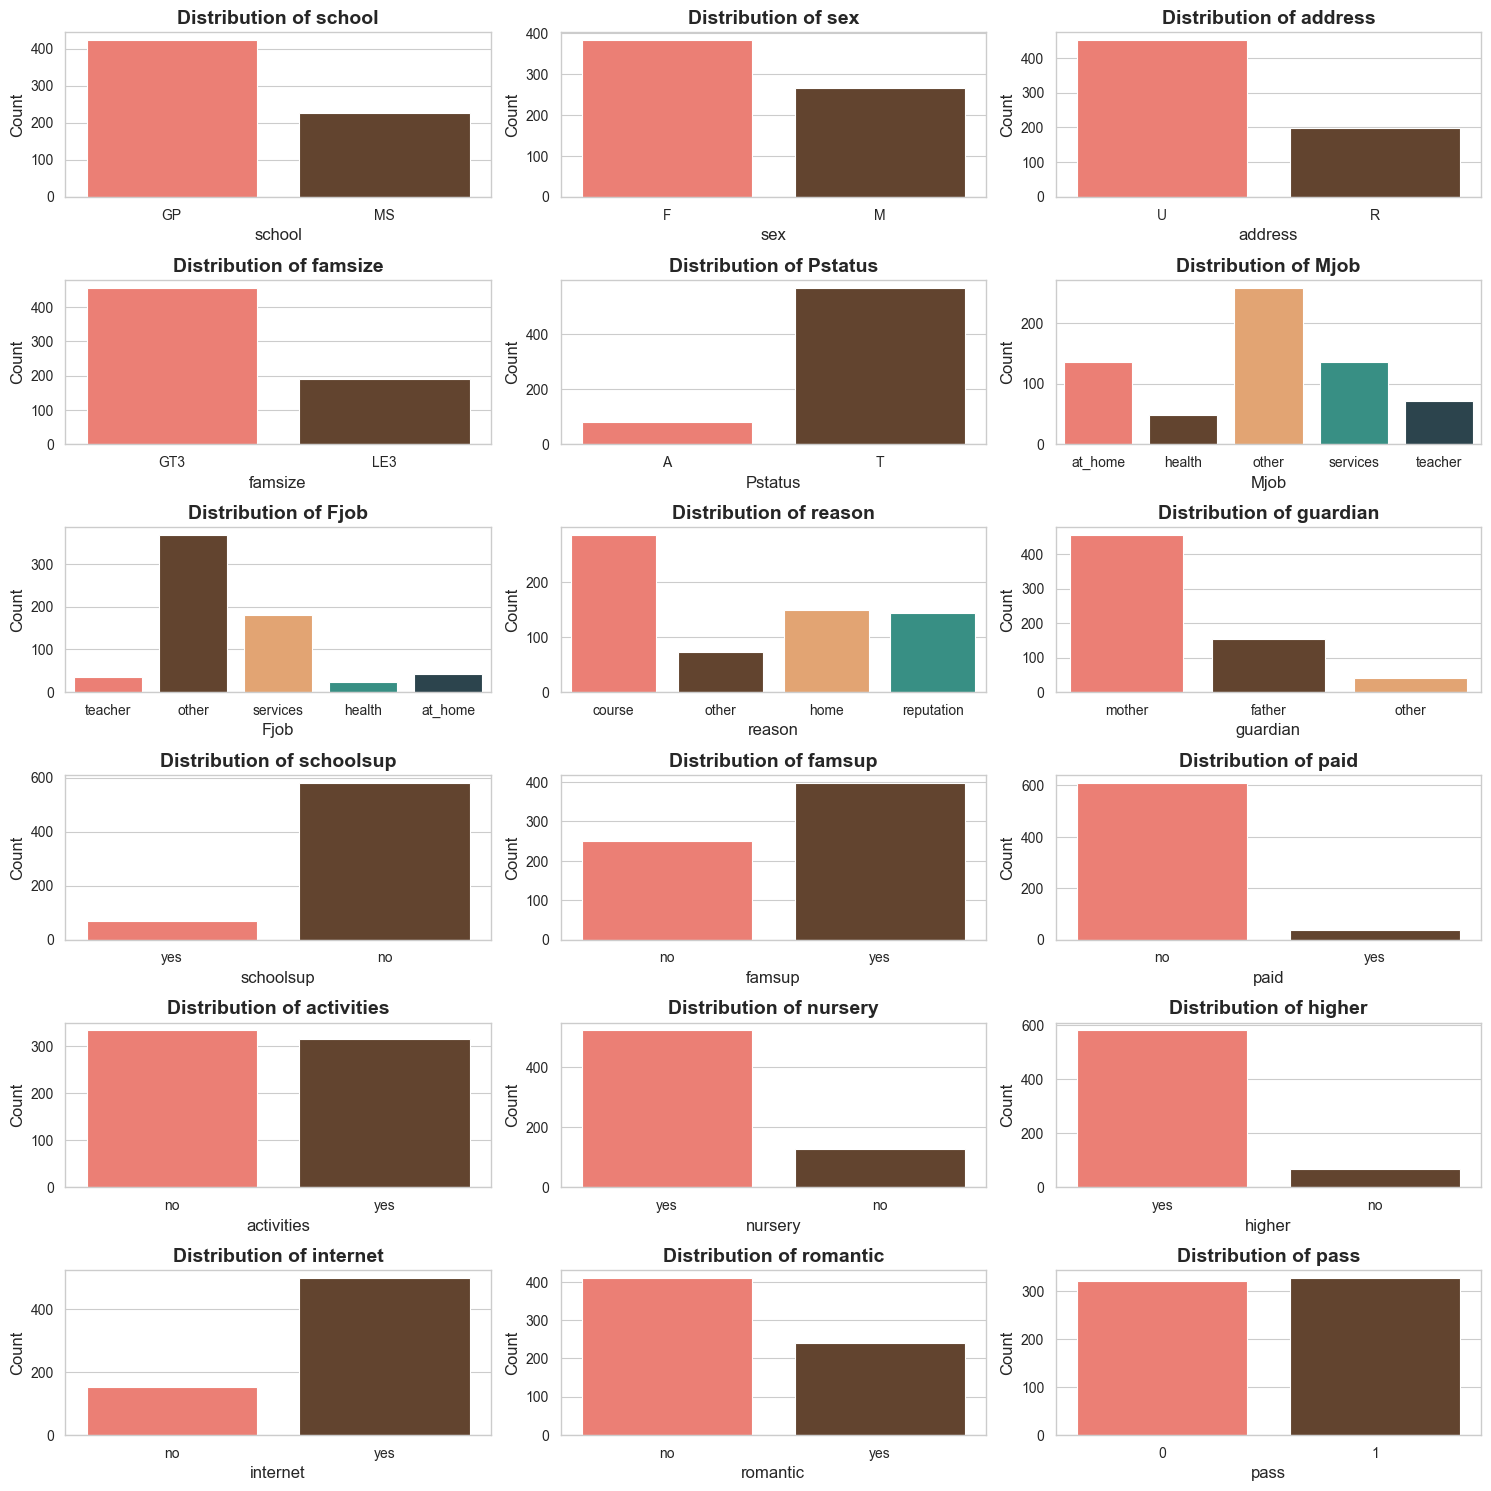

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define custom color palette
custom_palette = ['#FF6F61', '#6B4226', '#F4A261', '#2A9D8F', '#264653']

# Set Seaborn style and context
sns.set_style("whitegrid")
sns.set_context("paper")

# Define the columns you want to include in the dashboard
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'pass']

# Calculate the number of rows and columns for the grid layout
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(len(categorical_cols) / num_cols)  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the 2D array of axes for easy iteration
axes = axes.ravel()

# Iterate through categorical columns and create countplots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Remove any empty subplots
for i in range(len(categorical_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the dashboard
plt.show()


### **Comments for categorical features:**
* There are some people whi does not have access to internet, this is not a good indicator.
* almost 20% are just with father as guardien


### **3. One-Hot Encoding Part a)**
* Create a list called mylist for the categorical data.

In [14]:
# create a list fot categorical data ( represent categories or groups)
mylist = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
mylist

# Create a DataFrame from the list
df_mylist = pd.DataFrame(mylist, columns=["Categorical_Columns"])

# Display the DataFrame
df_mylist


,Categorical_Columns
0,school
1,sex
2,address
3,famsize
4,Pstatus
5,Mjob
6,Fjob
7,reason
8,guardian
9,schoolsup


### **3. One-Hot Encoding Part b)**
* Convert the categorical columns provided in the mylist variable into one-hot encoded columns. This will be useful when we build the decision tree.


In [15]:
# init onehotenconder
encoder = OneHotEncoder(sparse=False, drop='first')

# fit mylist
df_encoded = encoder.fit_transform(df[mylist])

# create a df with one-hot encoded columns
encoded_df = pd.DataFrame(df_encoded)

# add the enconded column to a old df
df = pd.concat([df, encoded_df], axis=1)

# drop. my list
df.drop(columns=mylist, inplace=True)

print(df)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         0       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
644   19     2     3           1          3         1       5         4   
645   18     3     1           1          2         0       4         3   
646   18     1     1           2          2         0       1         1   
647   17     3     1           2          1         0       2         4   
648   18     3     2           3          1         0       4         4   

     goout  Dalc  ...   16   17   18   19   20   21   22   23   24   25  
0        4     1  ...  1.

In [16]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,16,17,18,19,20,21,22,23,24,25
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,0,4,3,2,2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


### **4.Data Splitting: Part a)**
* Shuffle the dataset and split it into training and test sets. Use the first 500 rows for training and the rest for testing.


In [17]:
# Calculate the percentage, for 500 lines test set
percentage = (500 / 649) * 100  # 649 is the total number of students
formatted_percentage = "{:.0f}%".format(percentage)
print("500 lines for test set is equivalent to: ", formatted_percentage)



500 lines for test set is equivalent to:  77%


In [18]:
# Define the desired test percentage
test_percentage = 23

# Calculate the test size based on the percentage
total_samples = len(df)
test_size = int(total_samples * (test_percentage / 100))
train_size = total_samples - test_size

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)

# Display the sizes of the training and test sets
print("Training set:", train_size)
print("Test set:", test_size)


Training set: 500
Test set: 149


### **4.Data Splitting: Part b)** 
* Separate the features and target variable (pass) for the training and test sets.

In [19]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = df['pass']

# Drop the target variable from the DataFrame to get features
X = df.drop(columns=['pass'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)
print("Training set:", X_train.shape[0])
print("Test set:", X_test.shape[0])


Training set: 499
Test set: 150


In [20]:
X_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,16,17,18,19,20,21,22,23,24,25
104,15,3,4,1,2,0,5,4,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
114,15,2,1,1,2,0,5,4,2,1,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
155,17,2,1,1,1,0,5,4,5,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
221,16,4,3,1,2,0,1,3,2,1,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
7,17,4,4,2,2,0,4,1,4,1,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,15,4,2,1,4,0,3,3,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
106,15,2,2,1,4,0,5,1,2,1,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
270,16,4,4,1,1,0,5,3,2,1,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
435,15,1,1,2,2,0,5,4,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [21]:
# convert the columns to string to use the model
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


### **5.Building the Decision Tree Model** 
**Part a)** 
* Use a decision tree classifier with criterion entropy and max_depth of 5

**Part b)** 
* Fit the model on the training set.

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Part a) Create a Decision Tree Classifier with specified parameters
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Part b) Fit the model on the training set
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
# use decision tree classifier model
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### **5.Building the Decision Tree Model** 
**Part c)** 
* Score your tree.


In [24]:
# Calculate the accuracy on the test set using the trained classifier
test_accuracy = classifier.score(X_test, y_test)

# Print the accuracy with two decimal places
print(f"Test Accuracy (Entropy): {test_accuracy:.2%}")



Test Accuracy (Entropy): 66.67%


### **5.Building the Decision Tree Model** 
**Part d)**  
* Give a visualization of the decision tree. 
* Ensure the tree's features and class names are appropriately labeled.

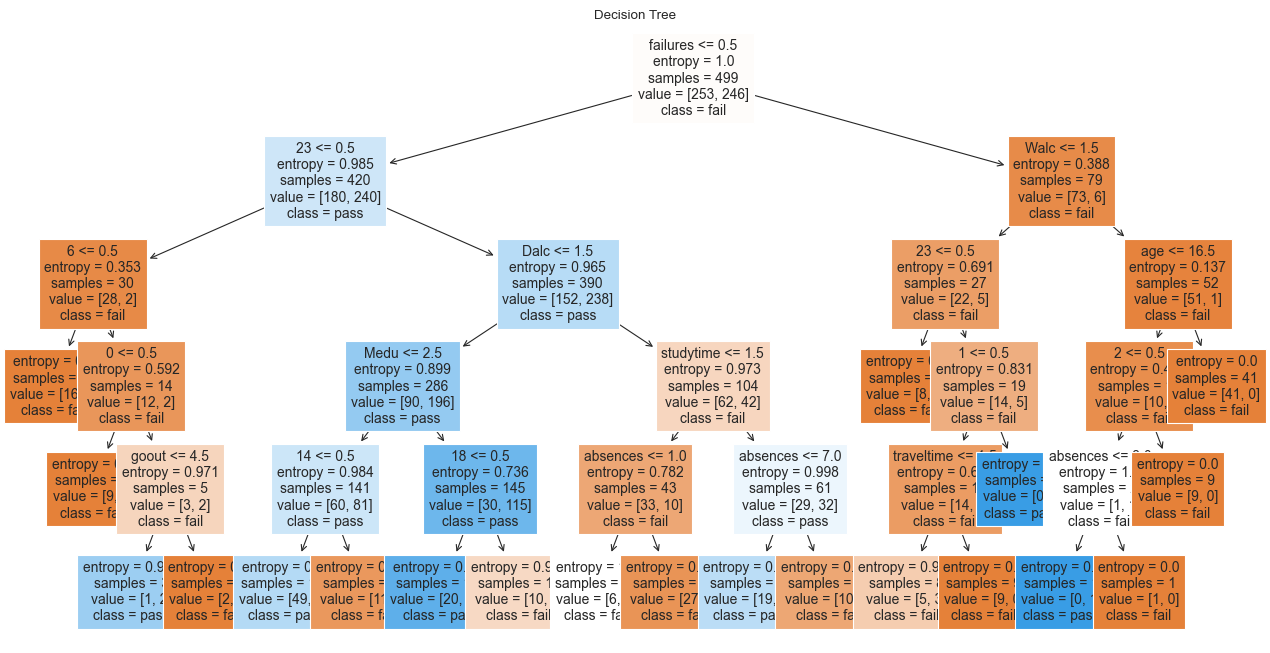

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier with your chosen parameters
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Fit the model on the training set
classifier.fit(X_train, y_train)

# Plot the decision tree using Matplotlib
plt.figure(figsize=(16, 8))
plot_tree(classifier, feature_names=X_train.columns, class_names=["fail", "pass"], filled=True, fontsize=10)
plt.title("Decision Tree")
plt.show()


### **5.Building the Decision Tree Model** 
**Part e)** 
* According to your tree, what are the top two level splitting features?

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier with your chosen parameters
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Fit the model on the training set
classifier.fit(X_train, y_train)

# Get the Decision Tree structure
tree = classifier.tree_

# Get the feature importances from the trained decision tree
feature_importances = classifier.feature_importances_

# Create a function to display the splitting features for each level
def display_splitting_features(node_id=0, depth=0):
    if node_id == -1:
        return

    # Get the feature index for this node
    feature_index = tree.feature[node_id]

    # Get the feature name
    feature_name = X_train.columns[feature_index]

    # Print the splitting feature for this level
    print(f"Level {depth}: Splitting feature = {feature_name}")

    # Recursively display for left and right child nodes
    display_splitting_features(tree.children_left[node_id], depth + 1)
    display_splitting_features(tree.children_right[node_id], depth + 1)

# Display splitting features starting from the root (node_id=0)
print("Splitting features:")
display_splitting_features()

Splitting features:
Level 0: Splitting feature = failures
Level 1: Splitting feature = 23
Level 2: Splitting feature = 6
Level 3: Splitting feature = 24
Level 3: Splitting feature = 0
Level 4: Splitting feature = 24
Level 4: Splitting feature = health
Level 5: Splitting feature = 24
Level 5: Splitting feature = 24
Level 2: Splitting feature = Dalc
Level 3: Splitting feature = Medu
Level 4: Splitting feature = 14
Level 5: Splitting feature = 24
Level 5: Splitting feature = 24
Level 4: Splitting feature = 18
Level 5: Splitting feature = 24
Level 5: Splitting feature = 24
Level 3: Splitting feature = studytime
Level 4: Splitting feature = absences
Level 5: Splitting feature = 24
Level 5: Splitting feature = 24
Level 4: Splitting feature = absences
Level 5: Splitting feature = 24
Level 5: Splitting feature = 24
Level 1: Splitting feature = Walc
Level 2: Splitting feature = 23
Level 3: Splitting feature = 24
Level 3: Splitting feature = 1
Level 4: Splitting feature = traveltime
Level 5: Spl

The two top features are failures and health.
The success depends on the number of failures and health of the student.

### **5.Building the Decision Tree Model** 
**Part f)**  
* Would Gini be appropriate here as well? Why?

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Function to train and evaluate a decision tree classifier
def train_and_evaluate_classifier(criterion, max_depth, X_train, y_train, X_test, y_test):
    # Create a Decision Tree Classifier with the specified parameters
    classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)

    # Fit the model on the training set
    classifier.fit(X_train, y_train)

    # Calculate the accuracy on the test set
    accuracy = classifier.score(X_test, y_test)

    return classifier, accuracy

# Train and evaluate a Decision Tree classifier with 'entropy' criterion and max_depth of 5
classifier_entropy, accuracy_entropy = train_and_evaluate_classifier('entropy', 5, X_train, y_train, X_test, y_test)

# Train and evaluate a Decision Tree classifier with 'gini' criterion and max_depth of 5
classifier_gini, accuracy_gini = train_and_evaluate_classifier('gini', 5, X_train, y_train, X_test, y_test)

# Print the accuracy for both criteria
print(f"Accuracy on the test set (Entropy): {accuracy_entropy:.2f}")
print(f"Accuracy on the test set (Gini): {accuracy_gini:.2f}")


Accuracy on the test set (Entropy): 0.67
Accuracy on the test set (Gini): 0.65


**Comments:**

It's a good idea to try both criteriaGini and Entrophy, the dataset is imbalanced, Gini impurity might be a better choice. this is not the case, even thoug using Gini is a good guide to compare 
Entropy is the best option since is simpler and more interpretable.


## 6.a) Evaluate the model's performance using 5-fold cross-validation. Is accuracy anappropriate metric, why?


When evaluating a machine learning model using 5-fold cross-validation, accuracy may not always be the most suitable metric. Considerations include imbalanced datasets, varying importance of different errors, and the problem's specific context. Alternative metrics like precision, recall, and F1-score may provide a more comprehensive evaluation..

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a list of scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

def cross_validate_metrics(model, X, y, metrics):
    crossv_scores = {}
    
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv=5, scoring=metric)
        crossv_scores[metric] = scores.mean()
    
    return crossv_scores

# Call the function to get cross-validation scores
crossv_scores = cross_validate_metrics(classifier, X_train, y_train, scoring_metrics)

# Print the cross-validation results for each metric
print("-----------------Cross-Validation Results-----------------")
for metric, score in crossv_scores.items():
    print(f"{metric.capitalize()}: {score:.2f}")


-----------------Cross-Validation Results-----------------
Accuracy: 0.71
Precision: 0.67
Recall: 0.79
F1: 0.72


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a list of scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

def cross_validate_metrics(model, X, y, metrics, model_name=""):
    crossv_scores = {}
    
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv=5, scoring=metric)
        crossv_scores[metric] = scores.mean()
    
    print(f"-----------------Cross-Validation Results ({model_name})-----------------")
    for metric, score in crossv_scores.items():
        print(f"{metric.capitalize()}: {score:.2f}")

# Call the function to get cross-validation scores for classifier
cross_validate_metrics(classifier, X_train, y_train, scoring_metrics, "Entropy")

# Call the function to get cross-validation scores for classifier_gini
cross_validate_metrics(classifier_gini, X_train, y_train, scoring_metrics, "Gini")


-----------------Cross-Validation Results (Entropy)-----------------
Accuracy: 0.70
Precision: 0.67
Recall: 0.79
F1: 0.73
-----------------Cross-Validation Results (Gini)-----------------
Accuracy: 0.71
Precision: 0.69
Recall: 0.79
F1: 0.73


### **6. Model Evaluation using Cross-Validation**
**Part b)** 
* Report the mean accuracy and its +/-variance.

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define a list of scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

def cross_validate_metrics(model, X, y, metrics, model_name=""):
    crossv_scores = {}
    
    for metric in metrics:
        scores = cross_val_score(model, X, y, cv=5, scoring=metric)
        crossv_scores[metric] = scores
    
    print(f"-----------------Cross-Validation Results ({model_name})-----------------")
    
    for metric in metrics:
        mean_score = crossv_scores[metric].mean()
        variance = np.var(crossv_scores[metric])
        print(f"{metric.capitalize()}: Mean = {mean_score:.2f}, Variance = {variance:.4f}")

# Call the function to get cross-validation scores for classifier
cross_validate_metrics(classifier, X_train, y_train, scoring_metrics, "Entropy")

# Call the function to get cross-validation scores for classifier_gini
cross_validate_metrics(classifier_gini, X_train, y_train, scoring_metrics, "Gini")


-----------------Cross-Validation Results (Entropy)-----------------
Accuracy: Mean = 0.70, Variance = 0.0023
Precision: Mean = 0.67, Variance = 0.0041
Recall: Mean = 0.79, Variance = 0.0050
F1: Mean = 0.73, Variance = 0.0006
-----------------Cross-Validation Results (Gini)-----------------
Accuracy: Mean = 0.71, Variance = 0.0023
Precision: Mean = 0.70, Variance = 0.0055
Recall: Mean = 0.78, Variance = 0.0071
F1: Mean = 0.73, Variance = 0.0009


### **7.Hyperparameter Tuning**
**Part a)** 

* Test the decision tree classifier with different max depths ranging from 1 to 20.

**Part b)**
* For each depth, evaluate the model using 5-fold cross-validation.

In [55]:
# diff max depths, range 1-20
depths = list(range(1, 21))
mean_accuracies = []
variances = []

for i in depths:
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=i)

    #  5-fold cross-validation
    cv_scores_accuracy = cross_val_score(classifier, X_train, y_train, cv=5)

    # calculate mean and  variance
    mean_accuracy = cv_scores_accuracy.mean()
    variance_accuracy = np.var(cv_scores_accuracy)

    # append accuracy and variance to their lists
    mean_accuracies.append(mean_accuracy)
    variances.append(variance_accuracy)

    # Print mean accuracy and variance for the current max depth
    print(f"ENTROPY Max depth: {i}, Mean Accuracy: {mean_accuracy:.2f}, Variance: {variance_accuracy:.4f}")

ENTROPY Max depth: 1, Mean Accuracy: 0.63, Variance: 0.0020
ENTROPY Max depth: 2, Mean Accuracy: 0.65, Variance: 0.0031
ENTROPY Max depth: 3, Mean Accuracy: 0.67, Variance: 0.0048
ENTROPY Max depth: 4, Mean Accuracy: 0.66, Variance: 0.0035
ENTROPY Max depth: 5, Mean Accuracy: 0.70, Variance: 0.0018
ENTROPY Max depth: 6, Mean Accuracy: 0.67, Variance: 0.0002
ENTROPY Max depth: 7, Mean Accuracy: 0.64, Variance: 0.0004
ENTROPY Max depth: 8, Mean Accuracy: 0.66, Variance: 0.0012
ENTROPY Max depth: 9, Mean Accuracy: 0.67, Variance: 0.0017
ENTROPY Max depth: 10, Mean Accuracy: 0.68, Variance: 0.0014
ENTROPY Max depth: 11, Mean Accuracy: 0.65, Variance: 0.0010
ENTROPY Max depth: 12, Mean Accuracy: 0.65, Variance: 0.0018
ENTROPY Max depth: 13, Mean Accuracy: 0.66, Variance: 0.0019
ENTROPY Max depth: 14, Mean Accuracy: 0.63, Variance: 0.0037
ENTROPY Max depth: 15, Mean Accuracy: 0.66, Variance: 0.0035
ENTROPY Max depth: 16, Mean Accuracy: 0.64, Variance: 0.0034
ENTROPY Max depth: 17, Mean Accur

In [59]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define max depths from 1 to 20
depths = list(range(1, 21))

# Initialize lists to store results
results = []

for i in depths:
    # Create the decision tree classifier
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=i)

    # Perform 5-fold cross-validation
    cv_scores_accuracy = cross_val_score(classifier, X_train, y_train, cv=5)

    # Calculate mean accuracy and variance
    mean_accuracy = cv_scores_accuracy.mean()
    variance_accuracy = np.var(cv_scores_accuracy)

    # Append results to the list
    results.append((i, mean_accuracy, variance_accuracy))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Max Depth', 'Mean Accuracy', 'Variance'])

# Print the DataFrame
print(results_df)


    Max Depth  Mean Accuracy  Variance
0           1       0.627131  0.002000
1           2       0.647172  0.003115
2           3       0.667253  0.004755
3           4       0.659212  0.003761
4           5       0.705293  0.001785
5           6       0.669313  0.000496
6           7       0.641313  0.000353
7           8       0.659414  0.000943
8           9       0.673475  0.001276
9          10       0.671475  0.001786
10         11       0.667495  0.001774
11         12       0.641374  0.000557
12         13       0.627354  0.000950
13         14       0.605374  0.002640
14         15       0.665535  0.003048
15         16       0.633434  0.002408
16         17       0.651434  0.001740
17         18       0.659475  0.002197
18         19       0.639495  0.003330
19         20       0.633455  0.002320


### **7.Hyperparameter Tuning**
**Part c)** 
* Try gini, do you get better results? Do the top splitting features change fromquestion 5f? Include Gini in your grid search

In [63]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define max depths from 1 to 20
depths = list(range(1, 21))

# Initialize lists to store results
results = []

for i in depths:
    # Create the decision tree classifier
    classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=i)

    # Perform 5-fold cross-validation
    cv_scores_accuracy_gini = cross_val_score(classifier_gini, X_train, y_train, cv=5)

    # Calculate mean accuracy and variance
    mean_accuracy = cv_scores_accuracy_gini.mean()
    variance_accuracy_gini = np.var(cv_scores_accuracy_gini)

    # Append results to the list
    results.append((i, mean_accuracy_gini, variance_accuracy_gini))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Max Depth (Gini)', 'Mean Accuracy (Gini)', 'Variance (Gini)'])

# Print the DataFrame
print(results_df)


    Max Depth (Gini)  Mean Accuracy (Gini)  Variance (Gini)
0                  1              0.635293         0.002000
1                  2              0.635293         0.003080
2                  3              0.635293         0.004720
3                  4              0.635293         0.003257
4                  5              0.635293         0.002026
5                  6              0.635293         0.000382
6                  7              0.635293         0.000622
7                  8              0.635293         0.000927
8                  9              0.635293         0.001394
9                 10              0.635293         0.003015
10                11              0.635293         0.002339
11                12              0.635293         0.000178
12                13              0.635293         0.001541
13                14              0.635293         0.001675
14                15              0.635293         0.001029
15                16              0.6352

### 8. Entropy and Gini.**
**Part a)** 
* Write Python code that calculates the entropy of a dataset D. You may assume that the classes are comprised of integers. Include printouts of the test cases

In [67]:

# # Test cases, datasets
dataset1 = [1, 2, 2, 3, 3, 3]
dataset2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dataset3 = [2, 3]

In [71]:
import numpy as np
from collections import Counter

def entropy(dataset):
    class_counts = Counter(dataset)
    total_samples = len(dataset)
    entropy_value = sum(-(count / total_samples) * np.log2(count / total_samples)
                       for count in class_counts.values())
    return entropy_value

def calculate_entropy_of_datasets(datasets):
    total_entropy = sum(entropy(dataset) for dataset in datasets)
    return total_entropy

# Sample datasets
datasets = [dataset1, dataset2, dataset3]

# Calculate entropy for each dataset and print
for i, dataset in enumerate(datasets, start=1):
    entropy_value = entropy(dataset)
    print(f"Entropy of dataset{i}: {entropy_value:.4f}")

# Calculate total entropy of the list of datasets and print
total_entropy = calculate_entropy_of_datasets(datasets)
print(f"Total entropy of datasets: {total_entropy:.4f}")


Entropy of dataset1: 1.4591
Entropy of dataset2: 0.0000
Entropy of dataset3: 1.0000
Total entropy of datasets: 2.4591


### 8. Entropy and Gini.**
**Part b)**  
* Write Python code that calculates the Gini of a non-empty dataset D. You may assume that the classes are comprised of integers. Include the definitions of both Entropy and Gini. Comment your code. Include printouts of the test cases

In [78]:
import pandas as pd
import numpy as np
from collections import Counter

def entropy(dataset):
    """
    Calculate the entropy of a dataset.

    Args:
    dataset (list): List of class labels.

    Returns:
    float: Entropy value.
    """
    class_counts = Counter(dataset)
    total_samples = len(dataset)
    
    # Initialize entropy
    entropy_value = 0
    
    for count in class_counts.values():
        # Calculate the proportion of samples in the class
        proportion_samples = count / total_samples
        
        # Calculate the entropy portion for this class
        entropy_i = -proportion_samples * np.log2(proportion_samples)
        
        # Add to total entropy
        entropy_value += entropy_i
    
    return entropy_value

def gini(dataset):
    """
    Calculate the Gini impurity of a dataset.

    Args:
    dataset (list): List of class labels.

    Returns:
    float: Gini impurity value.
    """
    class_counts = Counter(dataset)
    total_samples = len(dataset)
    
    # Initialize Gini impurity
    gini_impurity = 1
    
    for count in class_counts.values():
        # Calculate the proportion of samples in the class
        proportion_samples = count / total_samples
        
        # Calculate the Gini impurity portion for this class
        gini_i = proportion_samples * (1 - proportion_samples)
        
        # Add to total Gini impurity
        gini_impurity -= gini_i
    
    return gini_impurity

# Test cases
dataset1 = [1, 2, 2, 3, 3, 3]
dataset2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dataset3 = [2, 3]

# Create a DataFrame to store the results
results = pd.DataFrame({
    'DataSet': ['Dataset 1', 'Dataset 2', 'Dataset 3'],
    'Entropy': [entropy(dataset1), entropy(dataset2), entropy(dataset3)],
    'Gini Impurity': [gini(dataset1), gini(dataset2), gini(dataset3)]
})

print(results)


     DataSet   Entropy  Gini Impurity
0  Dataset 1  1.459148       0.388889
1  Dataset 2  0.000000       1.000000
2  Dataset 3  1.000000       0.500000


**Coments**

**Definitions:** 
**Entropy:**
Entropy is a measure of the disorder or uncertainty in a dataset's class distribution. In the context of machine learning and decision trees, it is used to evaluate the purity of a node in a decision tree. A node with low entropy means that it is highly pure, with all data points belonging to the same class. On the other hand, a node with high entropy suggests that the class distribution is diverse and uncertain, with data points spread across multiple classes.

**Gini Impurity:**
Gini impurity is another measure of impurity or disorder in a dataset's class distribution. Like entropy, it is used in decision tree algorithms to assess node purity. Gini impurity measures the probability of misclassifying a randomly chosen element in the dataset if it were labeled according to the distribution of classes in the node. A node with low Gini impurity is highly pure, while a node with high Gini impurity is impure.

### Dataset 1:
* Entropy: 1.459148 Moderate level of disorder or uncertainty in the dataset's class distribution. 
* Gini Impurity: 0.388889  is relatively low, the dataset's class distribution is somewhat pure with a limited level of impurity.

### Dataset 2:
* Entropy: 0.000000. The data set is completely pure, all samples belong to the same class. There is no uncertainty in class distribution.
* Gini Impurity: 1.000000. is the maximum value, suggesting the highest level of impurity possible, which is expected for a dataset with multiple classes and a uniform distribution.

### Dataset 3:
* Entropy: 1.000000. is relatively high, indicating a moderate level of disorder or uncertainty.
* Gini Impurity: 0.500000. Suggests a balanced level of impurity, the class distribution is not too pure or impure.

## **Bonus: Kaggle challenge:**

the challenge was done, the code is the next: https://www.kaggle.com/code/felixcazarez/intro-ai-titanic-0378585
The acurracy was 70% for the Kaggle analyzer page